In [1]:
import numpy as np
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import copy
import random
from statsmodels.nonparametric.smoothers_lowess import lowess
from ipywidgets import interact
import ipywidgets as widgets

In [2]:
datadict = joblib.load("Two_Port_Standard_Dictionary_Cleaned_Interpolated.pkl")

In [3]:
frequency_range = np.linspace(2,18,50)

In [4]:
def make_fake_lines(variable,num_lines,starting_deviation,slope_deviation,x_axis,smooth_frac):
    dataset_lines = []
    for iteration in range(num_lines):
        new_dataset = copy.deepcopy(datadict['CTN210']['System 2,7'][random.choice(datadict['CTN210']['System 2,7'].keys())][variable])
        magS11_points = []
        first_point = new_dataset[0] + np.random.normal(0,starting_deviation)
        magS11_points.append(first_point)
        delta_x = x_axis[1]-x_axis[0]
        for index in range(len(new_dataset)-1):
            delta_y = new_dataset[index+1]-new_dataset[index]
            segment_slope = delta_y / delta_x
            segment_slope += np.random.normal(0,slope_deviation)
            new_point_y_val = magS11_points[index] + (delta_x * segment_slope)
            magS11_points.append(new_point_y_val)
        new_magS11_points = lowess(magS11_points, x_axis, is_sorted=True, frac=smooth_frac, it=0)[:,1]
        dataset_lines.append(new_magS11_points)
    return dataset_lines

In [5]:
fake_lines = make_fake_lines("magS21",20,0.0001,0.0002,frequency_range,0.1)

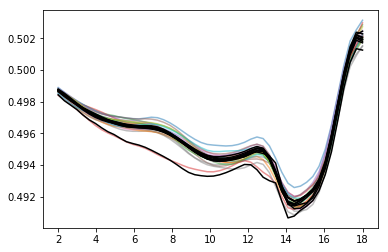

In [6]:
for line in fake_lines:
    plt.plot(frequency_range,line,alpha=0.5)
for key in datadict['CTN210']['System 2,7'].keys():
    plt.plot(frequency_range,datadict['CTN210']['System 2,7'][key]["magS21"],alpha=1,color="black")
plt.show()

In [7]:
def plot_fake_lines_with_frac(starting_deviation,slope_deviation,frac,normal_opacity):
    frequency_range = np.linspace(2,18,50)
    fake_lines = make_fake_lines("magS21",20,starting_deviation/1000.0,slope_deviation/1000.0,frequency_range,frac)
    for line in fake_lines:
        plt.plot(frequency_range,line,alpha=normal_opacity,lw=2)
    plt.show()

In [8]:
interact(plot_fake_lines_with_frac,
         starting_deviation=(0.01,1,0.01),
         slope_deviation=(0.01,2,0.01),
         frac=(0.001,0.1,0.001),
         normal_opacity=(0,1,0.01))

<function __main__.plot_fake_lines_with_frac>